In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('sbi.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [6]:
df.shape

(1338, 8)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

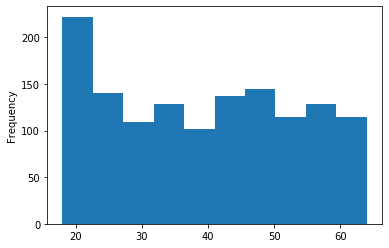

In [13]:
df['age'].plot.hist()

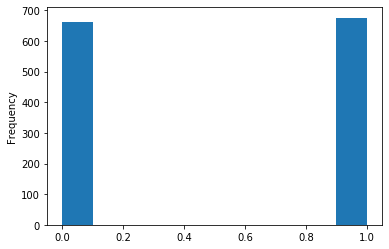

In [14]:
df['sex'].plot.hist()

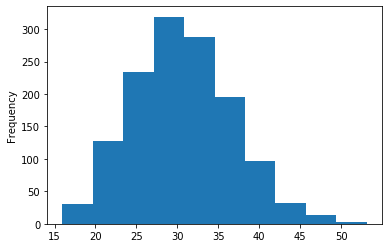

In [15]:
df['bmi'].plot.hist()

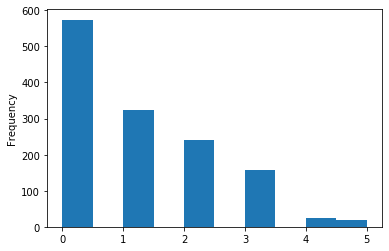

In [16]:
df['children'].plot.hist()

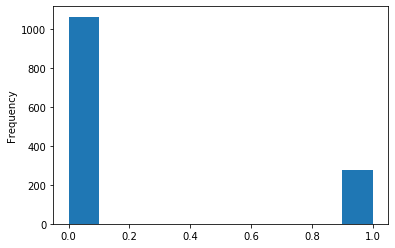

In [17]:
df['smoker'].plot.hist()

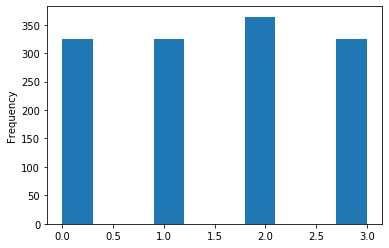

In [18]:
df['region'].plot.hist()

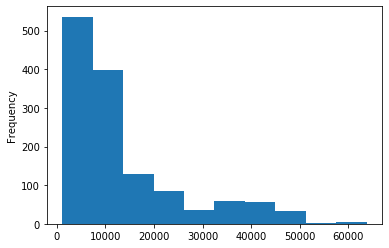

In [19]:
df['charges'].plot.hist()

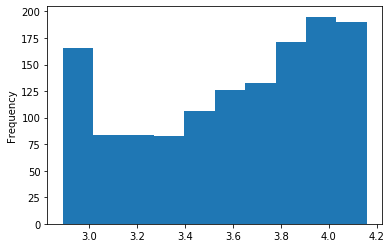

In [20]:
np.log(df['age']).plot.hist()

In [21]:
df['age']=np.log(df['age'])

In [22]:
df['age'].mean()

3.5972224663687853

In [23]:
df['age']=np.log(df['age'])

In [26]:
df['sex'].value_counts()

 0.0    676
-inf    662
Name: sex, dtype: int64

In [27]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [29]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [33]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [34]:
df['charges']=np.log(df['charges'])

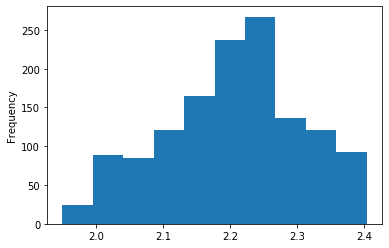

In [35]:
np.log(df['charges']).plot.hist()

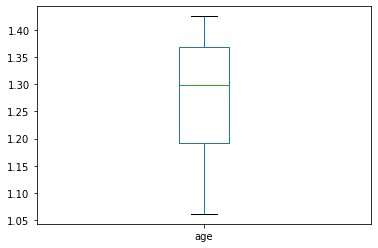

In [36]:
df['age'].plot.box()

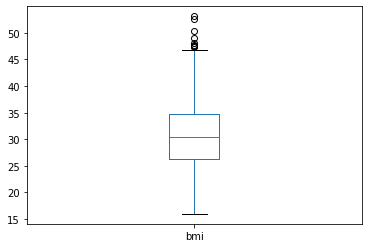

In [37]:
df['bmi'].plot.box()

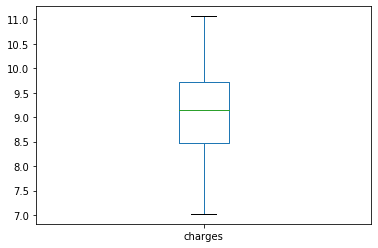

In [38]:
df['charges'].plot.box()

In [39]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.50)
Q3=df['bmi'].quantile(0.75)
Q4=df['bmi'].quantile(1)

In [40]:
print("First Quartile",Q1)
print("Second Quartile",Q2)
print("Third Quartile",Q3)
print("Fourth Quartile",Q4)

First Quartile 26.29625
Second Quartile 30.4
Third Quartile 34.69375
Fourth Quartile 53.13


In [41]:
IQR=Q3-Q1
print(IQR)

8.3975


In [42]:
LR=Q1-1.5*IQR
UR=Q3+1.5*IQR

In [43]:
LR,UR

(13.7, 47.290000000000006)

In [48]:
df.loc[df['bmi']>UR,'bmi']=np.mean(df['bmi'])

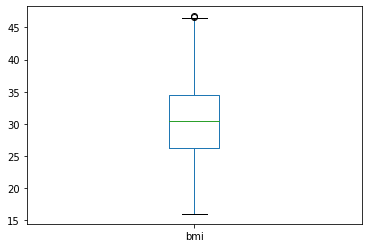

In [49]:
df['bmi'].plot.box()

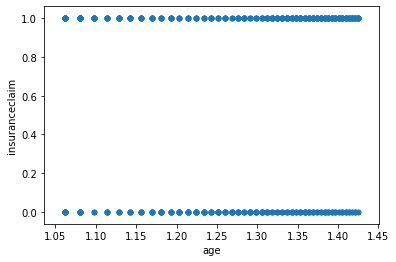

In [50]:
df.plot.scatter('age','insuranceclaim')

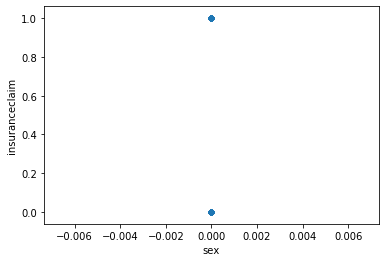

In [59]:
df.plot.scatter('sex','insuranceclaim')

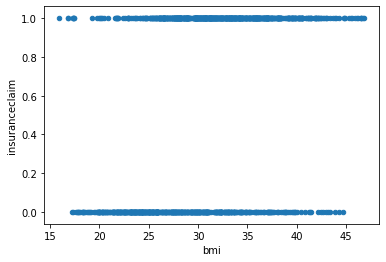

In [60]:
df.plot.scatter('bmi','insuranceclaim')

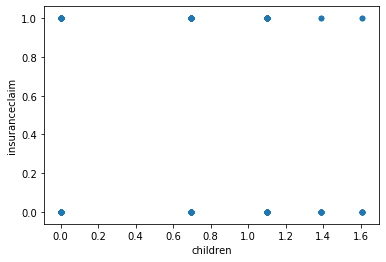

In [61]:
df.plot.scatter('children','insuranceclaim')

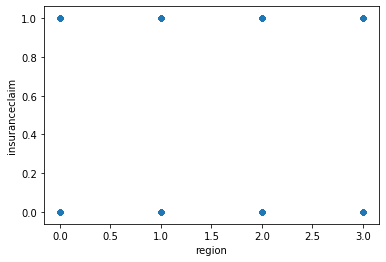

In [63]:
df.plot.scatter('region','insuranceclaim')

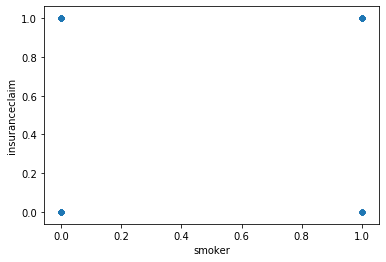

In [62]:
df.plot.scatter('smoker','insuranceclaim')

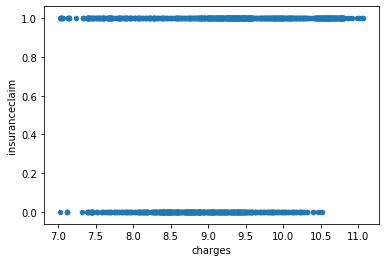

In [64]:
df.plot.scatter('charges','insuranceclaim')

In [65]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,NaN,0.105203,0.027550,-0.021755,0.003826,0.534531,0.075666
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.105203,NaN,1.000000,0.022505,-0.002811,0.155601,0.133055,0.379231
children,0.027550,NaN,0.022505,1.000000,0.019386,0.001716,0.122130,-0.224921
smoker,-0.021755,NaN,-0.002811,0.019386,1.000000,-0.002181,0.665506,0.333261
region,0.003826,NaN,0.155601,0.001716,-0.002181,1.000000,-0.042690,0.020891
charges,0.534531,NaN,0.133055,0.122130,0.665506,-0.042690,1.000000,0.232309
insuranceclaim,0.075666,NaN,0.379231,-0.224921,0.333261,0.020891,0.232309,1.000000


In [66]:
x=df.drop(['insuranceclaim'],axis=1)
y=df['insuranceclaim']
x.shape,y.shape

((1338, 7), (1338,))

In [68]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [78]:
clf=KNN(n_neighbors=5)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print("Test F1 Score ",k)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').